In [1036]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [1037]:
# Don't use scientific notation
np.set_printoptions(suppress=True)

In [1038]:
# 3.5.1 Simulate and forecast a random walk
np.random.seed(142)

timesteps = 500
starting_value = 18
my_rw = np.random.standard_normal(timesteps)
my_rw[0] = starting_value

# Using cumulative sum, each subsequent value will be added to the sum of all previous ones
# - so, the starting value will "move"
my_rw

array([18.        ,  0.90236186,  1.00580387,  0.47189026, -0.32621322,
       -0.2626502 , -0.36887721,  1.4787411 ,  1.29938058, -0.52552627,
       -0.53670479,  0.45447835, -0.33378693, -0.76708459,  0.95666902,
        0.25720374, -1.25293958,  1.89396846,  0.43501022,  0.31748397,
        0.45966684,  1.78974021,  2.64463903, -1.37393986,  0.28032314,
        1.70177907,  0.49711768,  1.55212896,  0.54167575, -0.68132893,
       -0.44186852,  0.79110185, -0.15233729,  0.77349058, -0.35907386,
        1.04938199, -3.19403553,  0.20186364, -0.8055216 , -1.83817647,
       -1.41027764, -0.56614807,  0.98533141,  0.0954986 , -1.55152856,
        0.45259318,  1.33602193, -0.56112593, -0.75025742, -2.00041701,
        1.06345967, -2.35448192, -0.19625929,  0.34668775,  0.48922894,
        1.36596521,  0.23027606, -1.57789818, -1.09171579, -1.79017943,
       -0.54552732,  0.0062887 ,  0.73279455, -0.38562304, -0.02659976,
        0.21567016, -0.58805046,  0.84234823, -0.50073378,  0.22

In [1039]:
my_rw = np.cumsum(my_rw)
my_rw

array([18.        , 18.90236186, 19.90816573, 20.38005599, 20.05384277,
       19.79119257, 19.42231536, 20.90105646, 22.20043704, 21.67491077,
       21.13820598, 21.59268434, 21.25889741, 20.49181282, 21.44848183,
       21.70568557, 20.45274599, 22.34671445, 22.78172467, 23.09920863,
       23.55887547, 25.34861568, 27.99325471, 26.61931485, 26.899638  ,
       28.60141707, 29.09853475, 30.65066372, 31.19233947, 30.51101054,
       30.06914202, 30.86024387, 30.70790658, 31.48139716, 31.1223233 ,
       32.17170529, 28.97766976, 29.1795334 , 28.3740118 , 26.53583533,
       25.12555769, 24.55940962, 25.54474104, 25.64023964, 24.08871108,
       24.54130425, 25.87732618, 25.31620025, 24.56594283, 22.56552582,
       23.62898549, 21.27450357, 21.07824428, 21.42493203, 21.91416097,
       23.28012618, 23.51040224, 21.93250406, 20.84078828, 19.05060885,
       18.50508153, 18.51137023, 19.24416477, 18.85854173, 18.83194197,
       19.04761213, 18.45956166, 19.30190989, 18.80117611, 19.02

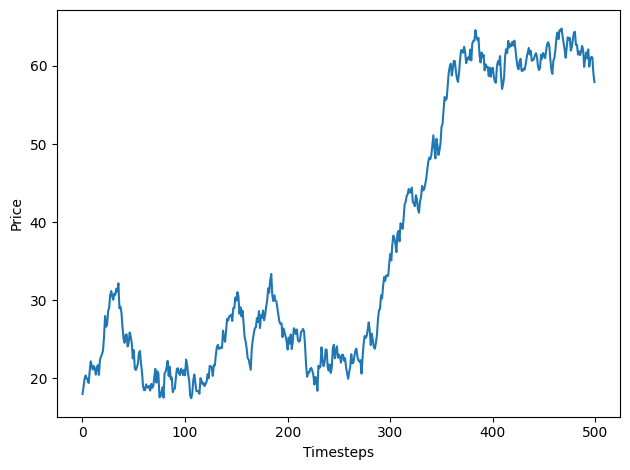

In [1040]:
fig, ax = plt.subplots()

ax.plot(my_rw)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Price")
fig.tight_layout()

In [1041]:
# Test for stationarity (but this is not part of the RW testing since it's not differenced)

testres = adfuller(my_rw)
f"Test value of {testres[0]} with p = {testres[1]}"

'Test value of -0.6132910286789396 with p = 0.8679504284355704'

In [1042]:
firstdiff = np.diff(my_rw, 1)
firstdiff

array([ 0.90236186,  1.00580387,  0.47189026, -0.32621322, -0.2626502 ,
       -0.36887721,  1.4787411 ,  1.29938058, -0.52552627, -0.53670479,
        0.45447835, -0.33378693, -0.76708459,  0.95666902,  0.25720374,
       -1.25293958,  1.89396846,  0.43501022,  0.31748397,  0.45966684,
        1.78974021,  2.64463903, -1.37393986,  0.28032314,  1.70177907,
        0.49711768,  1.55212896,  0.54167575, -0.68132893, -0.44186852,
        0.79110185, -0.15233729,  0.77349058, -0.35907386,  1.04938199,
       -3.19403553,  0.20186364, -0.8055216 , -1.83817647, -1.41027764,
       -0.56614807,  0.98533141,  0.0954986 , -1.55152856,  0.45259318,
        1.33602193, -0.56112593, -0.75025742, -2.00041701,  1.06345967,
       -2.35448192, -0.19625929,  0.34668775,  0.48922894,  1.36596521,
        0.23027606, -1.57789818, -1.09171579, -1.79017943, -0.54552732,
        0.0062887 ,  0.73279455, -0.38562304, -0.02659976,  0.21567016,
       -0.58805046,  0.84234823, -0.50073378,  0.22333631,  1.17

In [1043]:
# Test for stationarity

testres = adfuller(firstdiff)
f"Test value of {testres[0]} with p = {testres[1]}"

'Test value of -22.6937964144863 with p = 0.0'

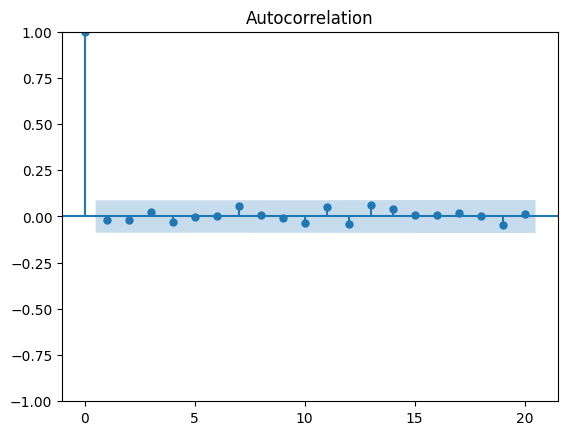

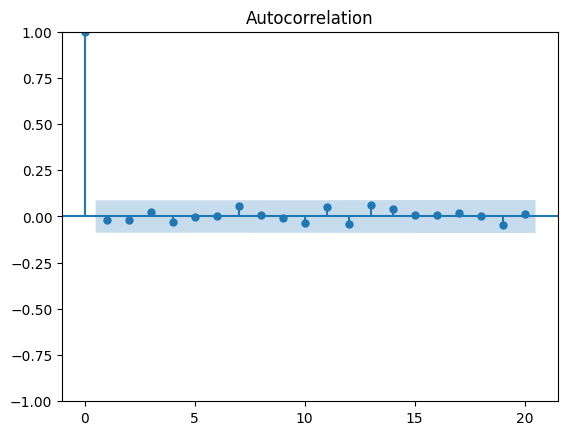

In [1044]:
plot_acf(firstdiff, lags = 20) 

In [1045]:
# Forecasting
training = my_rw[:400]
testing = my_rw[400:]

In [1046]:
# Naive forecasting
overall_mean = np.mean(training)
last_value = training[-1]
seasonal_mean = np.mean(training[-20:])
last_season = np.tile(training[-20:], 5)

f"OVERALL: {overall_mean}, LAST: {last_value}, SEASONAL MEAN: {seasonal_mean}"

'OVERALL: 30.83945009807414, LAST: 59.622806615297755, SEASONAL MEAN: 61.330114436218956'

In [1047]:
def mse(x, y):
    return (sum((x - y) ** 2)) / len(x)

In [1048]:
f"""OVERALL: {mse(testing, overall_mean)}, 
LAST: {mse(testing, last_value)},
 SEASONAL MEAN: {mse(testing, seasonal_mean)},
 LAST SEASON: {mse(testing, last_season)}
 """

# Mean of last 20 training examples performed best, but changing the seed can alter that easily!

'OVERALL: 933.7217560964565, \nLAST: 5.7643320280488135,\n SEASONAL MEAN: 2.7787446651714323,\n LAST SEASON: 6.369231965103486\n '

In [1049]:
training = pd.DataFrame(training)
training.tail()

,0
395,59.872661
396,58.719902
397,59.773621
398,58.609371
399,59.622807


In [1050]:
testing_indexrange = np.arange(len(training), len(training) + len(testing))

In [1051]:
testing = pd.DataFrame({"value" : testing,
                        "overall" : overall_mean,
                        "last_value" : last_value,
                        "last_season" : last_season })
testing.set_index(testing_indexrange, inplace=True)
testing.head()

,value,overall,last_value,last_season
400,59.766531,30.83945,59.622807,62.876471
401,58.605472,30.83945,59.622807,63.198790
402,57.967909,30.83945,59.622807,63.229800
403,57.841990,30.83945,59.622807,64.578564
404,59.966719,30.83945,59.622807,63.757317


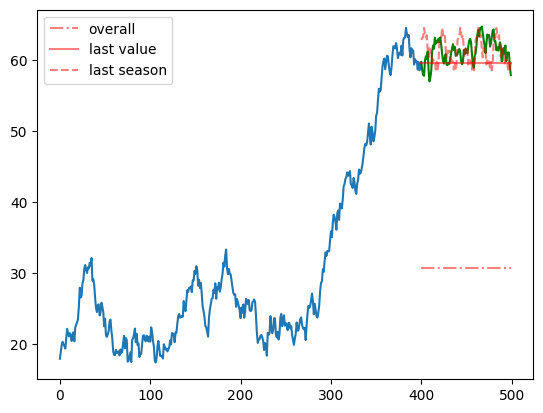

In [1052]:
fig, ax = plt.subplots()
ax.plot(training)
ax.plot(testing.value, "g")

ax.plot(testing.overall, 'r-.', alpha = 0.5 , label='overall')
ax.plot(testing.last_value, 'r-', alpha = 0.5 , label='last value')
ax.plot(testing.last_season, 'r--', alpha = 0.5 , label='last season')
ax.legend(loc = 2)


In [1053]:
# 3.5.2. GOOGL stock prices
df = pd.read_csv('data/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


In [1054]:
df.shape[0]

253

In [1055]:
training = df[:243]
# last 10 days to test
testing = df[243:]
testing.shape[0]

10

In [1056]:
testing = testing.set_index(np.arange(10))

In [1057]:
training.iloc[-1:].set_index(np.arange(1))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-13,2250.98999,2263.469971,2243.050049,2254.429932,2254.429932,1284100


In [1058]:
np.mean(training.Close)

1677.9408632098766

In [1059]:
training.iloc[-1:]["Close"].squeeze()

2254.429932

In [1060]:
# naive methods
testing["mean_all"] = np.mean(training.Close)
testing["lastv"] = training.iloc[-1:]["Close"].squeeze()
testing.loc[:, "latestv"] = training.iloc[-10:].set_index(np.arange(10)).Close

In [1061]:
training.iloc[-1:]["Close"]

242    2254.429932
Name: Close, dtype: float64

In [1062]:
testing

,Date,Open,High,Low,Close,Adj Close,Volume,mean_all,lastv,latestv
0,2021-04-14,2267.429932,2267.429932,2236.020020,2241.909912,2241.909912,1050100,1677.940863,2254.429932,2046.469971
1,2021-04-15,2261.949951,2296.000000,2251.169922,2285.250000,2285.250000,1458700,1677.940863,2254.429932,2062.520020
2,2021-04-16,2289.239990,2294.239990,2270.919922,2282.750000,2282.750000,1313600,1677.940863,2254.429932,2129.780029
3,2021-04-19,2270.179932,2304.090088,2270.179932,2289.760010,2289.760010,1514500,1677.940863,2254.429932,2218.959961
4,2021-04-20,2297.489990,2299.000000,2257.120117,2279.010010,2279.010010,1114400,1677.940863,2254.429932,2209.260010
5,2021-04-21,2272.050049,2280.000000,2244.820068,2278.350098,2278.350098,1160200,1677.940863,2254.429932,2239.030029
6,2021-04-22,2275.399902,2288.879883,2240.320068,2252.520020,2252.520020,1207300,1677.940863,2254.429932,2250.429932
7,2021-04-23,2267.000000,2306.120117,2261.250000,2299.929932,2299.929932,1453300,1677.940863,2254.429932,2270.669922
8,2021-04-26,2304.520020,2324.530029,2297.320068,2309.929932,2309.929932,1595200,1677.940863,2254.429932,2244.620117
9,2021-04-27,2317.632568,2317.632568,2286.159912,2290.979980,2290.979980,1756799,1677.940863,2254.429932,2254.429932


In [1063]:
f"""OVERALL: {mse(testing.Close, testing.mean_all)}, 
LAST: {mse(testing.Close, testing['lastv'])},
 LAST SEASON: {mse(testing.Close, testing.latestv)}
 """

'OVERALL: 364101.63552871544, \nLAST: 1082.3276503939412,\n LAST SEASON: 12909.079841837633\n '